In [322]:
import numpy as np
import matplotlib.pyplot as plt

In [215]:
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

In [216]:
def Misha(x):
    return np.sin(x[1])*np.e**((1-np.cos(x[0]))**2) + np.cos(x[0])*np.e**((1-np.sin(x[1]))**2)+(x[0]-x[1])**2

In [252]:
def disp(new_simplex, old_simplex):
    sigma = norm(new_simplex - old_simplex)
    return sigma.sum()
def norm(x):
    return np.sqrt((x**2).sum())

Критейрий останова функции - сумма норм разностей координат точек последнего и предпоследнего симлексов меньше значения $\epsilon$.
После нескольких экспериметов подтверждено, что рекомендуемые параметры $\alpha=1, \beta=\frac12, \gamma=2$ являются оптимальными 

In [345]:
def Nelder(opt_func, epsilon):
    steps_no = 300
    n = 2
    alpha = 1
    gamma = 2
    rho = .5
#    sigma = .5
    simplex = (10*np.random.rand((n+1)*n)-5).reshape(n+1,n)
    xl = (10*np.random.rand(n)-5)
    xh = (10*np.random.rand(n)-5)
    xg = (10*np.random.rand(n)-5)
    values = np.zeros(n+1)
    values[0] = opt_func(simplex[0])
    values[1] = opt_func(simplex[1])
    values[2] = opt_func(simplex[2])
    for i in range(steps_no):
        new_simplex = np.array([xl, xg, xh])
        if disp(new_simplex, simplex) < epsilon:
            simplex = new_simplex
            plt.plot(np.append(simplex[:,0],simplex[0,0]), np.append(simplex[:,1],simplex[0,1]))
            print('Convergence at ', simplex[0])
            print('Func value = ', opt_func(simplex[0]))
            print('No of iterations =',i)
            print('Final simplex = ', simplex)
            break
        simplex = new_simplex
        plt.plot(np.append(simplex[:,0],simplex[0,0]), np.append(simplex[:,1],simplex[0,1]))
        values[0] = opt_func(simplex[0])
        values[1] = opt_func(simplex[1])
        values[2] = opt_func(simplex[2])
        xh = simplex[np.argmax(values)]
        xg = simplex[3 - np.argmax(values) - np.argmin(values)]
        xl = simplex[np.argmin(values)]
        xc = (xg+xl)/2
        xr = (1+alpha)*xc - alpha*xh
#        print('xr=',xr)
        fr = opt_func(xr)
        if fr < opt_func(xl):
            xe = (1-gamma)*xc + gamma*xr
            fe = opt_func(xe)
            if fe < fr:
                xh = xe
                continue
            else:
                xh = xr
        elif fr < opt_func(xg):
            xh = xr
            continue
        elif fr < opt_func(xh):
            bfr = xh
            xh = xr
            xr = bfr
        #step 6
        xs = rho*xh + (1-rho)*xc
        fs = opt_func(xs)
        fh = opt_func(xh)
        if fs < fh:
            xh = xs
            continue
        else:
            xg = xl + (xg-xl)/2
            xh = xl + (xh-xl)/2
            
        #step9:
    
        
    sorted_values = np.sort(values, axis=0)
#    print(values)
#    print(xh)
    plt.show()
    return simplex

Результат работы на функции Химмельблау.
Т.к. исходный симплекс задается случайно, алгоритм сходится к одной из 3 точек минимума.

Convergence at  [ 3.58442834 -1.84812653]
Func value =  1.77003919384e-20
No of iterations = 92
Final simplex =  [[ 3.58442834 -1.84812653]
 [ 3.58442834 -1.84812653]
 [ 3.58442834 -1.84812653]]


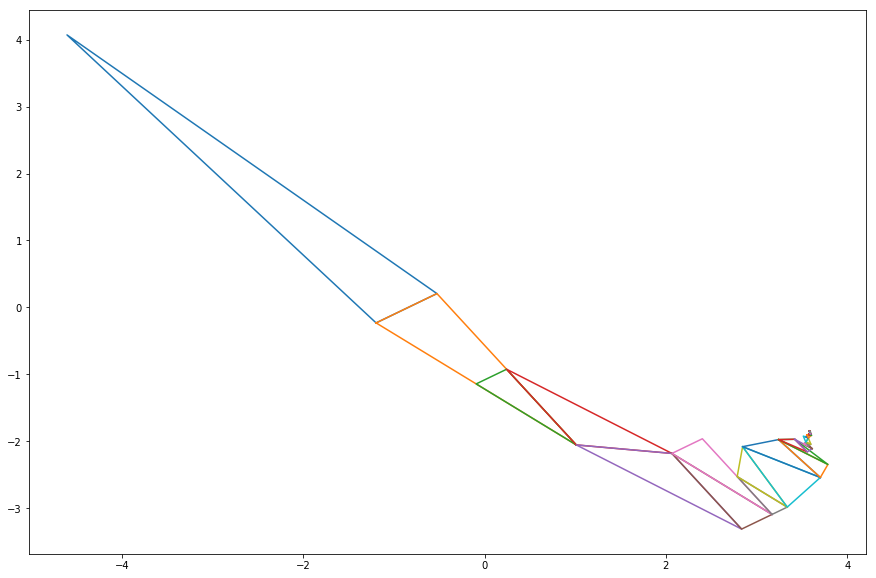

In [346]:
fig = plt.figure(figsize=[15,10])
H_res = Nelder(Himmelblau, 1e-10)

Результат работы на функции Mishra's Bird.
По тем же причинам алгоритм сходится к точке "соответствующей" случайно заданной исходной.

Convergence at  [-3.13024679 -1.58214218]
Func value =  -106.764536749
No of iterations = 83
Final simplex =  [[-3.13024679 -1.58214218]
 [-3.13024679 -1.58214218]
 [-3.13024679 -1.58214218]]


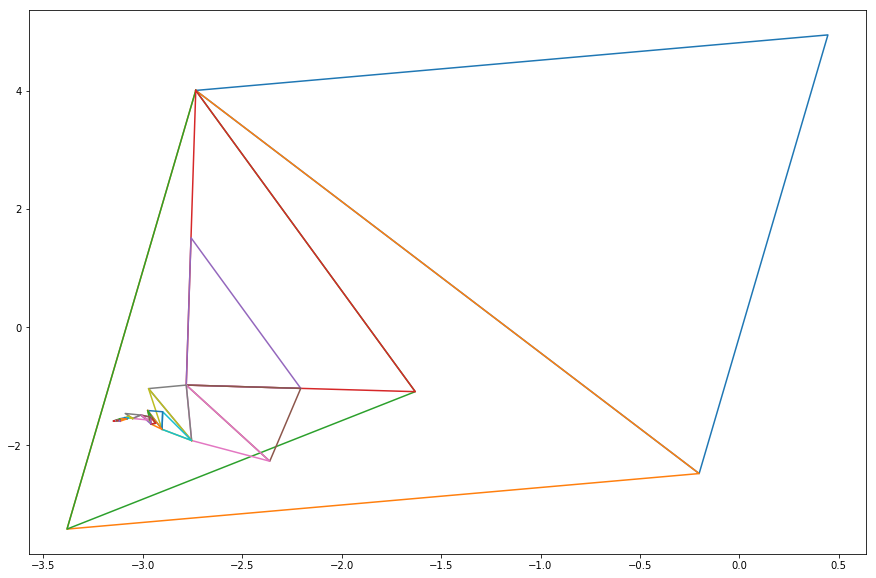

In [369]:
fig = plt.figure(figsize=[15,10])
B_res = Nelder(Misha, 1e-10)